In [ ]:
import tensorflow as tf

TensorFlow 基本型態：

In [ ]:
# 產生一個常數
tc = tf.constant(2)
# 產生一個變數
tv = tf.Variable(2)
print(tc)
print(tv)

tf.Tensor(2, shape=(), dtype=int32)
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>


零階張量，稱為標量

In [ ]:
import tensorflow as tf
tc = tf.constant(6)
print(tc)  # 顯示 Tensor(常數資訊，Shape=()表示標量，dtype=int32 表示整數)
print("{} 階Tensor".format(tc.ndim))  # 顯示 Tensor 的維度

tf.Tensor(6, shape=(), dtype=int32)
0 階Tensor


一階張量，稱為向量

In [ ]:
tc = tf.constant([2, 3, 4, 5, 6, 7]) 
print("{} 階Tensor ".format(tc.ndim))    # 顯示 Tensor 的維度

1 階Tensor 


二階張量，稱為矩陣

In [ ]:
tc = tf.constant([[2, 3, 4], [5, 6, 7]])
print("{} 階Tensor ".format(tc.ndim))    # 顯示 Tensor 的維度

2 階Tensor 


## **Eager Execution**

TensorFlow 引入「Eager Execution」動態圖模式，這個模式在TensorFlow2.0為預設模式，不同與以往的靜態圖模式需要建立計算圖才能執行，Eager Execution模式一旦執行就會返回數值。


TensorFlow 基本運算：

In [ ]:
import numpy as np
import tensorflow as tf

print("Eager Execution 是否啟動: {}".format(tf.executing_eagerly()))

Eager Execution 是否啟動: True


In [ ]:
tc01 = tf.constant(5)
tc02 = tf.constant(6)
print("tc01 = {}".format(tc01))
print("tc02 = {}".format(tc02))

tc01 = 5
tc02 = 6


檢查資料型態

In [ ]:
print(tc01)
print(tc02)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


基本運算

In [ ]:
tc03 = tc01 + tc02
print("tc01 + tc02 = {}".format(tc03))
tc04 = tc01 * tc02
print("tc01 * tc02 = {}".format(tc04))
tc05 = tc01 - tc02
print("tc01 - tc02 = {}".format(tc05))
tc06 = tc01 / tc02
print("tc01 / tc02 = {}".format(tc06))

tc01 + tc02 = 11
tc01 * tc02 = 30
tc01 - tc02 = -1
tc01 / tc02 = 0.8333333333333334


2D Tensor 運算，在Eager Execution模式下可以混和 Tensor 和 Numpy 做運算

In [ ]:
tc01 = tf.constant([[1., 2.], [3., 4.]], dtype=tf.float32)
tc02 = np.array([[5., 6.], [7., 8.]], dtype=np.float32)
print("tc01 constant: {}D Tensor".format(tc01.ndim))
print("tc02 constant: {}D Tensor".format(tc02.ndim))

tc03 = tc01 + tc02
print("tc01 + tc02 = \n{}".format(tc03))
tc04 = tf.matmul(tc01, tc02)
print("tc01 * tc02 = \n{}".format(tc04))

tc01 constant: 2D Tensor
tc02 constant: 2D Tensor
tc01 + tc02 = 
[[ 6.  8.]
 [10. 12.]]
tc01 * tc02 = 
[[19. 22.]
 [43. 50.]]


輸出結果為 Tensor 格式，可以將它轉為 Numpy 格式

In [ ]:
print(tc03)
print("NumpyArray:\n {}".format(tc03.numpy()))
print(tc04)
print("NumpyArray:\n {}".format(tc04.numpy()))

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
NumpyArray:
 [[ 6.  8.]
 [10. 12.]]
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
NumpyArray:
 [[19. 22.]
 [43. 50.]]


計算梯度

In [ ]:
x = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss = x * x

grad = tape.gradient(loss, x)
print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


---
## **Keras**

TensorFlow2.0 將 Keras 納為內建高階API，因此不必再而外安裝keras套件，直接透過`tf.keras`指令使用。相較於`tf.keras`和`keras`的差別，`tf.keras`更能全面支援tensorflow 指令與模式，例如支援 Eager Exection, tf.data, TPU 訓練等等。

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image

**## Sequential Model**

Sequential Model 有兩種搭建方式，下面為分類問題範例：輸入為30x30 (拉平為900的一維向量)的影像，輸出為15 (分為十個類別)。

EX01:

In [ ]:
model = keras.Sequential(name='Sequential')
model.add(layers.Dense(64, activation='relu', input_shape=(900,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))

EX02:

In [ ]:
model = tf.keras.Sequential([layers.Dense(64, activation='relu', input_shape=(900,)),
                layers.Dense(64, activation='relu'), 
                layers.Dense(15, activation='softmax')])

顯示剛剛搭建網路

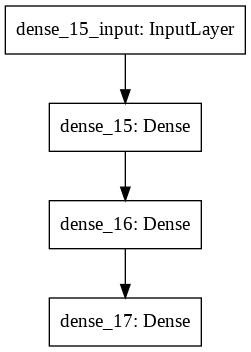

In [ ]:
# 產生網絡拓撲圖
plot_model(model, to_file='Sequential Model.png')

# 秀出網絡拓撲圖
Image('Sequential Model.png')

# **Functional API**


1. Sample Network：使用 Functional API 一樣可以快速完成幾行代碼和上面 Sequential Model 相同架構。

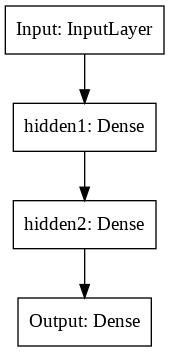

In [ ]:
inputs = keras.Input(shape=(900,), name='Input')
hidden1 = layers.Dense(64, activation='relu', name='hidden1')(inputs)
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(hidden1)
outputs = layers.Dense(15, activation='softmax', name='Output')(hidden2)

model = keras.Model(inputs=inputs, outputs=outputs)

# 產生網絡拓撲圖
plot_model(model, to_file='Functional API Sample Model.png')

# 秀出網絡拓撲圖
Image('Functional API Sample Model.png')

2. Multi Input Model：多輸入單輸出模型，網路架構如下。

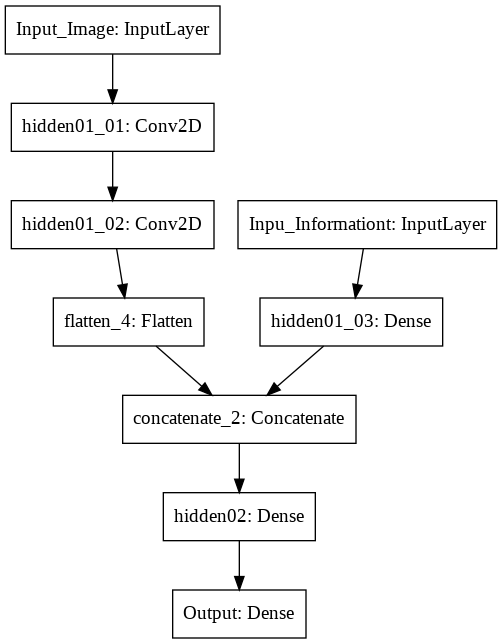

In [ ]:
input_img = keras.Input(shape=(30, 30, 1), name='Input_Image')
input_info = keras.Input(shape=(1, ), name='Inpu_Informationt')

hidden1_1 = layers.Conv2D(64, kernel_size=5, strides=2, activation='relu', name='hidden01_01')(input_img)
hidden1_2 = layers.Conv2D(32, kernel_size=5, strides=2, activation='relu', name='hidden01_02')(hidden1_1)
hidden1_2_ft= layers.Flatten()(hidden1_2)
hidden1_3 = layers.Dense(64, activation='relu', name='hidden01_03')(input_info)
concat = layers.Concatenate()([hidden1_2_ft, hidden1_3])
hidden2 = layers.Dense(64, activation='relu', name='hidden02')(concat)
outputs = layers.Dense(1, name='Output')(hidden2)

model = keras.Model(inputs=[input_img, input_info], outputs=outputs)

# 產生網絡拓撲圖
plot_model(model, to_file='Functional API Multi Input Model.png')

# 秀出網絡拓撲圖
Image('Functional API Multi Input Model.png')

3. Multi Output Network：單輸入多輸出模型，這種類型的架構在影像處理的領域時常看到。



*   物件偵測：輸入一張圖像，預測物件位置與物件類別等。
*   人像識別：輸入一張圖像，預測圖片中人的性別、年齡等。




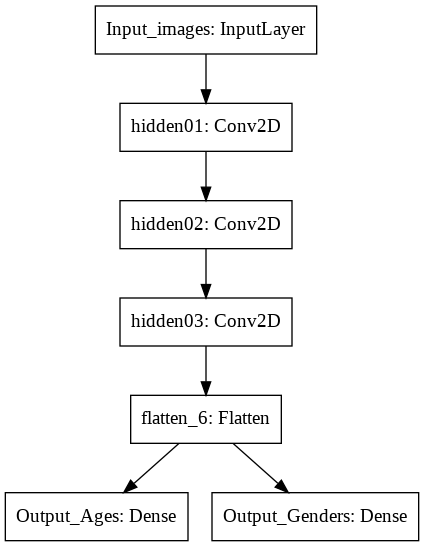

In [ ]:
input_imgs = keras.Input(shape=(30, 30, 1), name='Input_images')

hidden1 = layers.Conv2D(64, kernel_size=3, activation='relu', name='hidden01')(input_imgs)
hidden2 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden02')(hidden1)
hidden3 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden03')(hidden2)
flatten = layers.Flatten()(hidden3)

output_ages = layers.Dense(1, name='Output_Ages')(flatten)
output_genders = layers.Dense(1, name='Output_Genders')(flatten)

model = keras.Model(inputs=input_imgs, outputs=[output_ages, output_genders])

# 產生網絡拓撲圖
plot_model(model, to_file='Functional API Multi Output Model.png')

# 秀出網絡拓撲圖
Image('Functional API Multi Output Model.png')

4. Multi Input and Multi Output Network：多輸入多輸出模型。

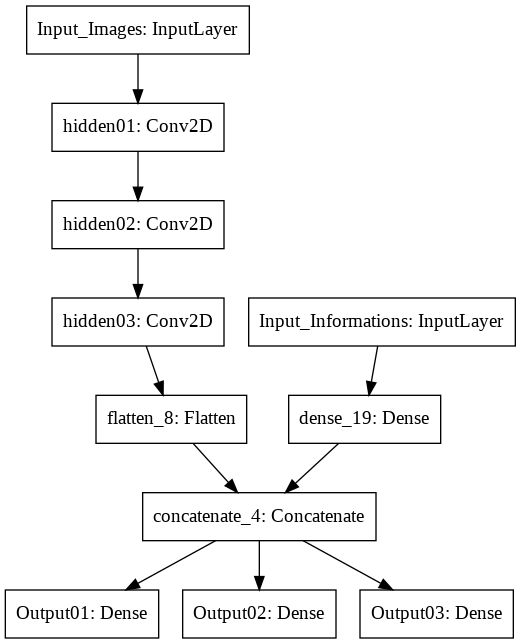

In [ ]:
inputs_imgs = keras.Input(shape=(30, 30, 1), name='Input_Images')
hidden1 = layers.Conv2D(64, kernel_size=3, activation='relu', name='hidden01')(inputs_imgs)
hidden2 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden02')(hidden1)
hidden3 = layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', name='hidden03')(hidden2)
flatten = layers.Flatten()(hidden3)

input_infos = keras.Input(shape=(10, ), name='Input_Informations')
hidden4 = layers.Dense(64)(input_infos)

concat = layers.Concatenate()([flatten, hidden4])

output_weathers = layers.Dense(1, name='Output01')(concat)
output_temps = layers.Dense(1, name='Output02')(concat)
output_humidities = layers.Dense(1, name='Output03')(concat)

model = keras.Model(inputs=[inputs_imgs, input_infos], 
                    outputs=[output_weathers, output_temps, output_humidities])

# 產生網絡拓撲圖
plot_model(model, to_file='Functional API Multi Input and Multi Output Model.png')

# 秀出網絡拓撲圖
Image('Functional API Multi Input and Multi Output Model.png')

## **tf.data**

基本操作

1. tf.data.Dataset.from_tensors:

In [ ]:
tfdataset = tf.data.Dataset.from_tensors(tf.constant([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], shape=(10, )))
print(tfdataset)tf.data.Dataset.range(10).map(lambda x: x*2)

<TensorDataset shapes: (10,), types: tf.int32>


2. tf.data.Dataset.from_tensor_slices:

In [ ]:
x_tfdataset = tf.data.Dataset.from_tensor_slices(tf.constant([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], shape=(10, )))
print(x_tfdataset)

y_tfdataset = tf.data.Dataset.from_tensor_slices(tf.constant([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], shape=(10, )))
print(y_tfdataset)

<TensorSliceDataset shapes: (), types: tf.int32>
<TensorSliceDataset shapes: (), types: tf.int32>


3. 用 for loop 讀取數據：

In [ ]:
for data00 in tfdataset:
    print(data00)

tf.Tensor([11 12 13 14 15 16 17 18 19 20], shape=(10,), dtype=int32)


In [ ]:
for data01, data02 in zip(x_tfdataset, y_tfdataset):
    print('x: {}, y: {}'.format(data01, data02))

x: 10, y: 10
x: 11, y: 12
x: 12, y: 14
x: 13, y: 16
x: 14, y: 18
x: 15, y: 20
x: 16, y: 22
x: 17, y: 24
x: 18, y: 26
x: 19, y: 28


4. 用 take 讀取資料：

In [ ]:
for data00 in tfdataset:
    print(data00)

tf.Tensor([11 12 13 14 15 16 17 18 19 20], shape=(10,), dtype=int32)


In [ ]:
for data01, data02 in zip(x_tfdataset.take(6), y_tfdataset.take(6)):
    print('x: {}, y: {}'.format(data01, data02))

x: 10, y: 10
x: 11, y: 12
x: 12, y: 14
x: 13, y: 16
x: 14, y: 18
x: 15, y: 20


In [ ]:
for data01, data02 in zip(x_tfdataset.take(9), y_tfdataset.take(9)):
    print('x: {}, y: {}'.format(data01, data02))

x: 10, y: 10
x: 11, y: 12
x: 12, y: 14
x: 13, y: 16
x: 14, y: 18
x: 15, y: 20
x: 16, y: 22
x: 17, y: 24
x: 18, y: 26


5. tf.data.Dataset.zip:

In [ ]:
tfdataset = tf.data.Dataset.zip((x_tfdataset, y_tfdataset))
print(tfdataset)

<ZipDataset shapes: ((), ()), types: (tf.int32, tf.int32)>


6. 可以使用 map 來轉換數據:


In [ ]:
tf.data.Dataset.range(15).map(lambda tfx: tfx*2)

<MapDataset shapes: (), types: tf.int64>

7. 可以使用字典方式為 elements 組件命名:

In [ ]:
tfx = tf.data.Dataset.range(15)
tfy = tf.data.Dataset.range(15).map(lambda tfx: tfx*2)

tfdataset = tf.data.Dataset.zip({"tfx": tfx, "tfy": tfy})
print(tfdataset)

<ZipDataset shapes: {tfx: (), tfy: ()}, types: {tfx: tf.int64, tfy: tf.int64}>


In [ ]:
for tfdata in tfdataset.take(15):
    print('tfx: {}, tfy: {}'.format(tfdata['tfx'], tfdata['tfy']))

tfx: 0, tfy: 0
tfx: 1, tfy: 2
tfx: 2, tfy: 4
tfx: 3, tfy: 6
tfx: 4, tfy: 8
tfx: 5, tfy: 10
tfx: 6, tfy: 12
tfx: 7, tfy: 14
tfx: 8, tfy: 16
tfx: 9, tfy: 18
tfx: 10, tfy: 20
tfx: 11, tfy: 22
tfx: 12, tfy: 24
tfx: 13, tfy: 26
tfx: 14, tfy: 28


8. 設定batch，讀取數量

In [ ]:
tfdataset = tf.data.Dataset.zip({"tfx": tfx, "tfy": tfy}).batch(3)

for tfdata in tfdataset.take(4):
    print('tfx: {}, tfy: {}'.format(tfdata['tfx'], tfdata['tfy']))

tfx: [0 1 2], tfy: [0 2 4]
tfx: [3 4 5], tfy: [ 6  8 10]
tfx: [6 7 8], tfy: [12 14 16]
tfx: [ 9 10 11], tfy: [18 20 22]
